In [3]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

We'll continue to make use of the fuel economy dataset in this workspace.

In [2]:
# read in dataframe
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task 1**: Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. **Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

In [51]:
# get pandas series w/boolean values for whether cars per manufacturer are 80 and over
over_80 = fuel_econ['make'].value_counts() >= 80

In [52]:
# convert to dataframe (this isn't a good solution but the only way I could think of removing the false values)
over_80 = over_80.to_frame()

In [53]:
# only keep true values
over_80 = over_80[over_80['make'] == True]

In [54]:
# create series array of indexes for list of manufacturer names
over_80 = over_80.index.values

In [55]:
# get dataframe from fuel_econ where make is in that manufacturer names list
df80 = fuel_econ[fuel_econ.make.isin(over_80)]

In [56]:
# confirm this was done correctly
df80.make.value_counts()

BMW              523
Mercedes-Benz    269
Porsche          235
Ford             218
Chevrolet        212
MINI             201
Audi             201
Volkswagen       174
Hyundai          158
Dodge            140
Lexus            125
Kia              124
Cadillac         118
Toyota           116
Infiniti         108
Honda            101
Jaguar            98
Mazda             87
Name: make, dtype: int64

In [71]:
# sort np array to alphabetize facet grid
over_80.sort()

In [74]:
# to get min and max values for bins
df80.comb.describe()

count    3208.000000
mean       25.198091
std         5.956012
min        13.858000
25%        21.000000
50%        24.391000
75%        28.530925
max        57.782400
Name: comb, dtype: float64

In [77]:
# setting discrete bins
bins = np.arange(13, 58 + 3, 3)

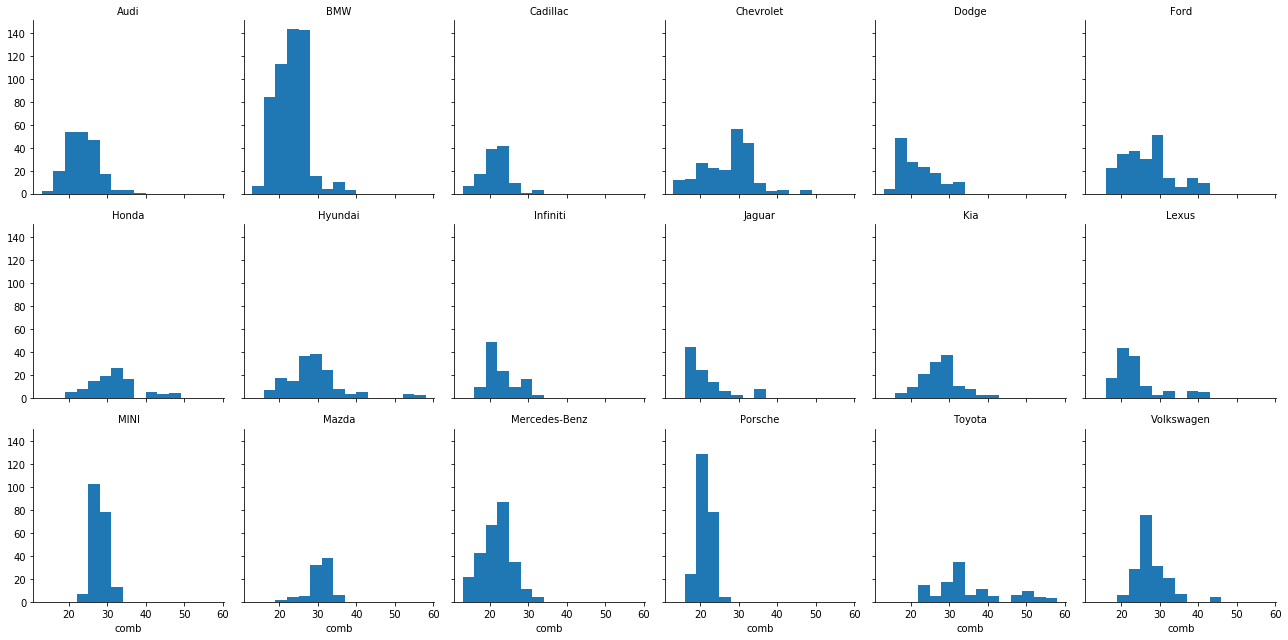

In [81]:
# facetgrid of over 80-car manufacturers's combined fuel efficiency car counts 
g = sns.FacetGrid(data = df80, col = 'make', col_wrap = 6, col_order = over_80);
g.map(plt.hist, 'comb', bins = bins);
g.set_titles('{col_name}');

**Task 2**: Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.

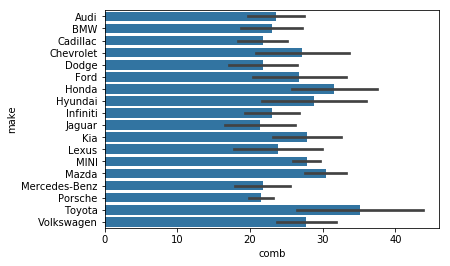

In [95]:
base_color = sns.color_palette()[0]
sns.barplot(data = df80, 
           y = 'make',
           x = 'comb',
           color = base_color,
           order = over_80,
           ci = 'sd');